In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler , OneHotEncoder , MinMaxScaler , OrdinalEncoder
from sklearn.model_selection import cross_val_predict , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score , recall_score , f1_score , accuracy_score
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [11]:
data= pd.read_csv("D:\dataset\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [84]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [13]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [19]:
round(data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.43,9.07,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.70,0.46,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.94,1.03,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.61,17.52,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.00,51.59,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.53,0.53,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.11,23.01,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.34,0.47,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.07,1.18,0.0,0.0,0.8,1.8,6.2


In [20]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
data.duplicated().sum()

723

In [22]:
for col in data[["sex" , "cp" , "fbs" ,"restecg" , "exang" ,"thal" , "ca" , "slope"  , "target"]]:
    print(data[col].value_counts())
    print("---------------------------")

1    713
0    312
Name: sex, dtype: int64
---------------------------
0    497
2    284
1    167
3     77
Name: cp, dtype: int64
---------------------------
0    872
1    153
Name: fbs, dtype: int64
---------------------------
1    513
0    497
2     15
Name: restecg, dtype: int64
---------------------------
0    680
1    345
Name: exang, dtype: int64
---------------------------
2    544
3    410
1     64
0      7
Name: thal, dtype: int64
---------------------------
0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64
---------------------------
1    482
2    469
0     74
Name: slope, dtype: int64
---------------------------
1    526
0    499
Name: target, dtype: int64
---------------------------


Visualization Data

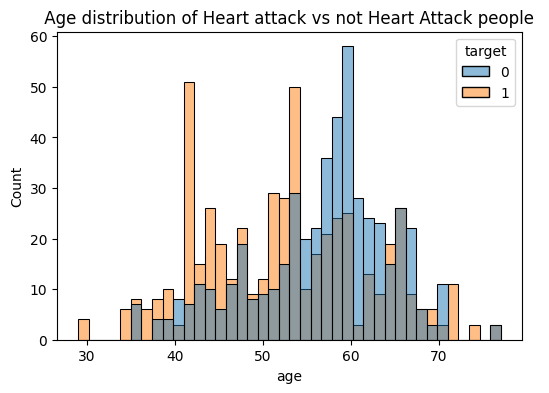

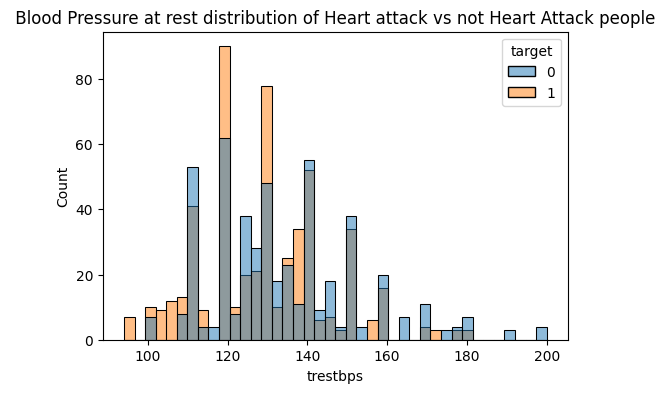

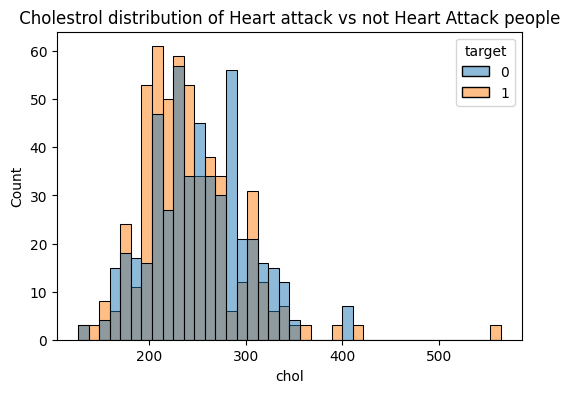

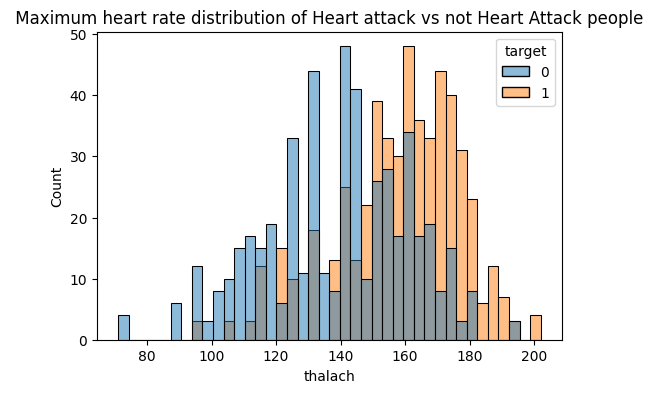

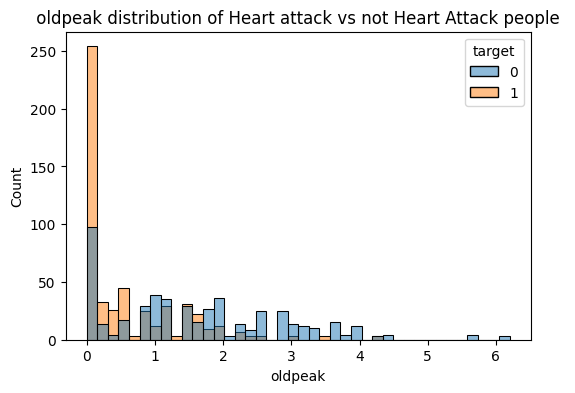

In [29]:
Dictionary={"age":"Age" , "trestbps":"Blood Pressure at rest" , "chol":"Cholestrol", "thalach":"Maximum heart rate" , "oldpeak":"oldpeak"}
for col in data[["age" ,"trestbps" ,  "chol" , "thalach" , "oldpeak"]]:
    plt.figure(figsize=(6 , 4))
    sns.histplot(x=col, data=data , bins=40  , hue="target")
    plt.title(f" {Dictionary[col]} distribution of Heart attack vs not Heart Attack people ")
    plt.show()

<Figure size 1000x800 with 0 Axes>

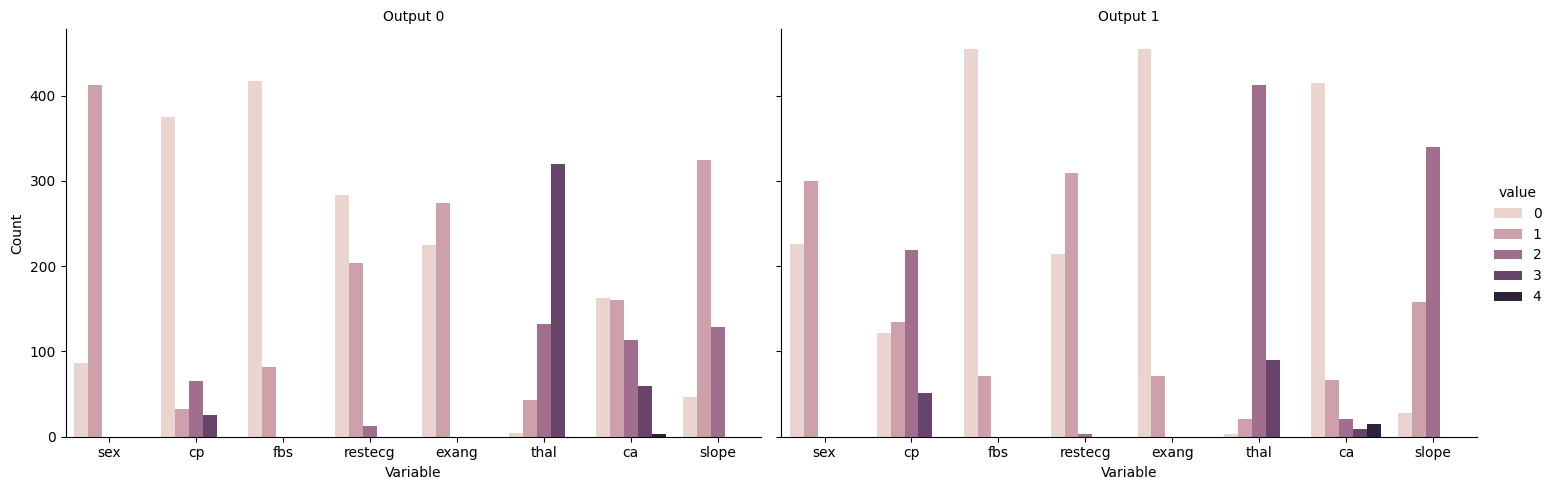

In [30]:
cols = ["sex" , "cp" , "fbs" ,"restecg" , "exang" ,"thal" , "ca" , "slope"  ]
plt.figure(figsize=(10 , 8))
df_long = pd.melt(data, id_vars=["target"], value_vars=cols)

diagram = sns.catplot( x="variable", hue="value", col="target",data=df_long, kind="count",aspect=1.5)

diagram.set_axis_labels("Variable", "Count")
diagram.set_titles("Output {col_name}")
plt.show()

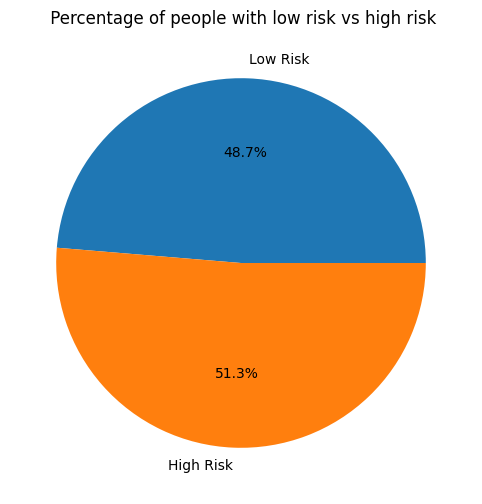

In [31]:
plt.figure(figsize=(8 , 6))
labels=["Low Risk" , "High Risk"]
sizes=[data.target.value_counts()[0] ,data.target.value_counts()[1]]
plt.pie(sizes, labels=labels , autopct='%1.1f%%')
plt.title(" Percentage of people with low risk vs high risk")
plt.axis('off')
plt.show()

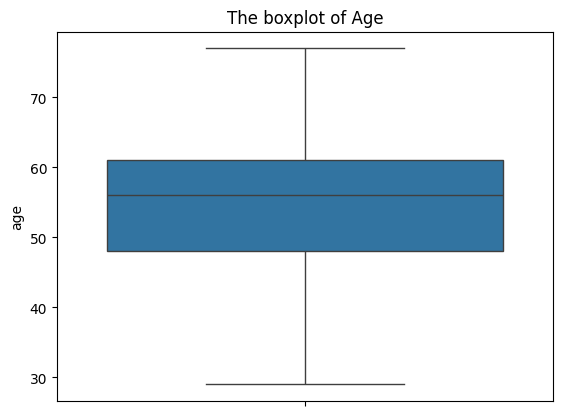

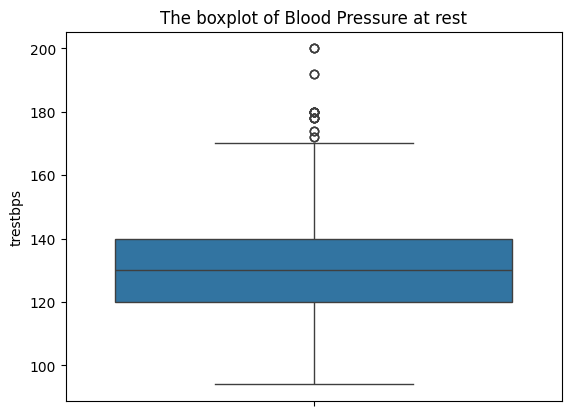

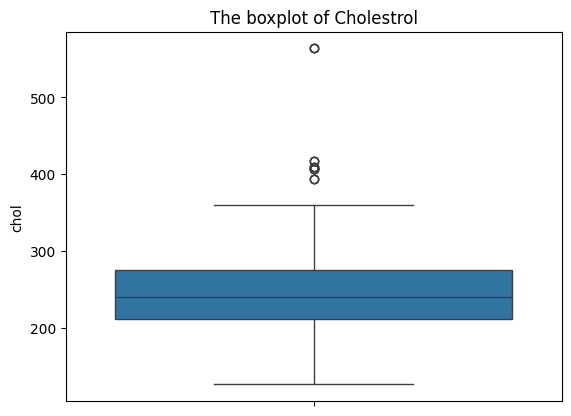

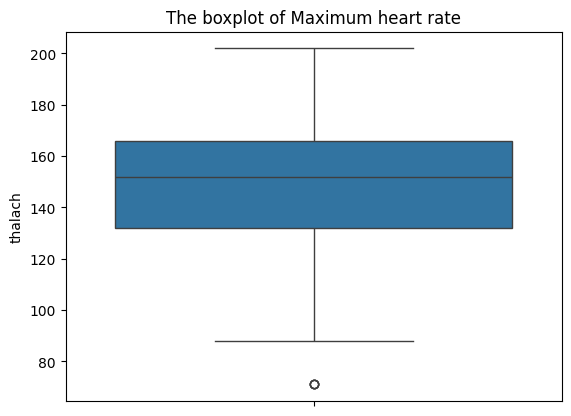

In [33]:
Dictionary={"age":"Age" , "trestbps":"Blood Pressure at rest" , "chol":"Cholestrol", "thalach":"Maximum heart rate"}
for col in data[["age" , "trestbps" ,  "chol" , "thalach"]]:
    sns.boxplot(y=col , data=data)
    plt.xlabel={col}
    plt.title(f"The boxplot of {Dictionary[col]}")
    plt.show()

<Axes: >

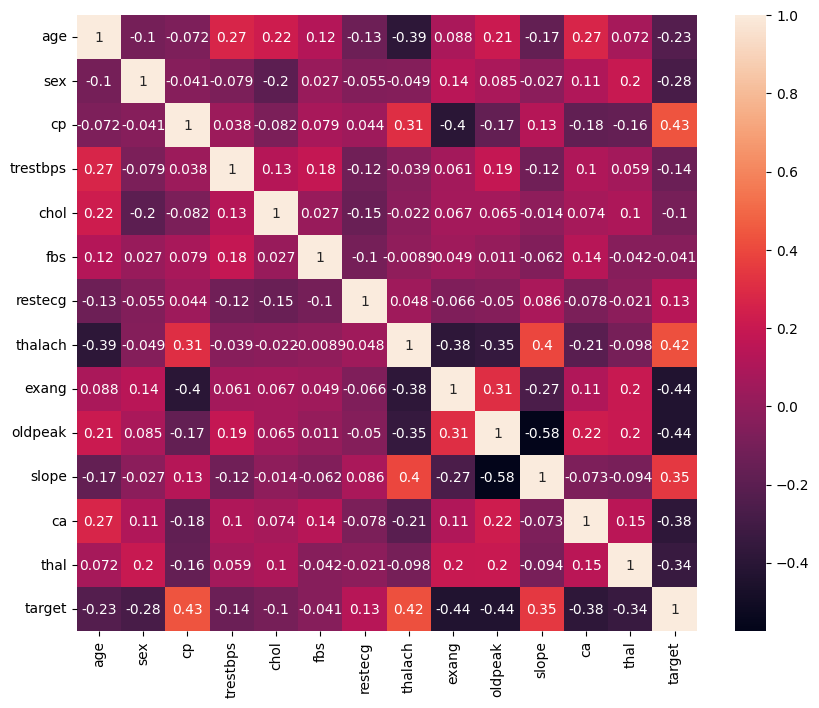

In [34]:
plt.figure(figsize=(10 , 8))
sns.heatmap(data.corr() , annot=True)

Preprocessing

In [36]:
data.shape

(1025, 14)

In [37]:
def outlier (col):
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR

        upper_array = np.where(dataset[col]>=upper)[0]
        lower_array = np.where(dataset[col]<=lower)[0]

        dataset.drop(index=upper_array, inplace=True)
        dataset.drop(index=lower_array, inplace=True)

In [38]:
for col in ["age" ,"trestbps" ,  "chol" , "thalach" , "oldpeak"]:
    if '[609] not found in axis':
        continue
    else :
        outlier(col)

In [39]:
data.shape

(1025, 14)

Split _ train/test

In [52]:
y,x = data['target'], data.drop("target", axis=1)

In [53]:
x.drop(columns=['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg'] , inplace=True)

In [54]:
x_train , x_test  , y_train , y_test=train_test_split(x , y , test_size=0.2 , random_state=4)

In [55]:
x_train.head()

,cp,thalach,exang,oldpeak,slope,ca,thal
968,0,155,1,3.1,0,0,3
952,2,170,0,0.0,2,0,2
490,0,159,0,0.0,2,1,2
127,2,152,0,1.2,0,0,2
659,0,182,0,0.0,2,0,2


In [56]:
dataset_num=x_train[["thalach", 'oldpeak' ]]
dataset_cat=x_train[["cp", "exang" , "ca" , 'slope' , 'thal']]

In [57]:
std_list=list(dataset_num)
cat_list=list(dataset_cat)
full_pipeline=ColumnTransformer([
    ("std" , MinMaxScaler() , std_list),
    ("1hot" ,OneHotEncoder()  , cat_list),
])
x_train_prepared=full_pipeline.fit_transform(x_train)
x_train_prepared[:1]

array([[0.64122137, 0.5       , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ]])

Model Selection

In [58]:
sample_data=x_train.iloc[:5]
sample_label=y_train[:5]
sample_data_pre=full_pipeline.transform(sample_data)

In [59]:
# I picked this code from the IBM course for classification
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')

In [60]:
def sample_data(model):
    print ("prediction :" ,  model.predict(sample_data_pre))
    print  ("labels:" ,  list(sample_label))

In [61]:
def gridsearchcv(param_grid , model):

    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search=grid.fit(x_train_prepared, y_train)
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)

KNN

In [62]:
knn= KNeighborsClassifier(metric= 'euclidean', n_neighbors= 3, weights='distance', algorithm='ball_tree')
knn.fit(x_train_prepared,y_train)
sample_data(knn)


prediction : [0 1 1 1 1]
labels: [0, 1, 1, 1, 1]


In [63]:
knn_pred = cross_val_predict(knn, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, knn_pred)
recall = recall_score(y_train, knn_pred)
fscore=f1_score(y_train ,knn_pred )
accuracy=accuracy_score(y_train ,knn_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.9747126436781609
Recall score: 0.9906542056074766
fscore score: 0.9826187717265353
accuracy score: 0.9817073170731707


In [64]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
gridsearchcv(param_grid_knn , KNeighborsClassifier() )

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best Accuracy: 0.9817073170731707


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       392
           1       0.97      0.99      0.98       428

    accuracy                           0.98       820
   macro avg       0.98      0.98      0.98       820
weighted avg       0.98      0.98      0.98       820

Confusion matrix, without normalization
[[381  11]
 [  4 424]]


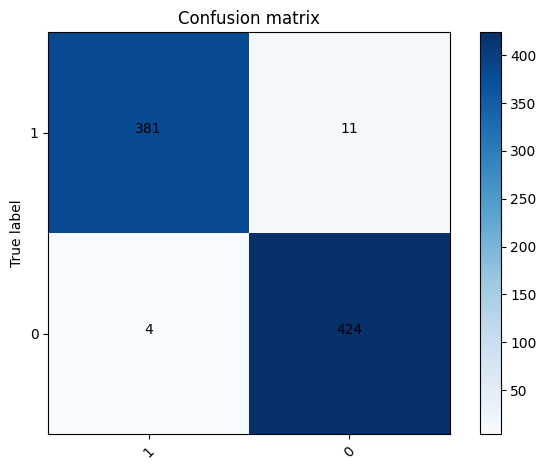

In [83]:
cm=confusion_matrix(y_train, knn_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, knn_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

Decision Tree

In [67]:
tree= DecisionTreeClassifier(criterion= 'gini', max_depth =20, max_features='sqrt', min_samples_leaf= 4,min_samples_split=10, random_state=None, splitter='random')
tree.fit(x_train_prepared,y_train)
sample_data(tree)

prediction : [0 1 0 1 1]
labels: [0, 1, 1, 1, 1]


In [68]:
tree_pred = cross_val_predict(tree, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, tree_pred)
recall = recall_score(y_train, tree_pred)
fscore=f1_score(y_train ,tree_pred )
accuracy=accuracy_score(y_train ,tree_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.8333333333333334
Recall score: 0.8177570093457944
fscore score: 0.8254716981132076
accuracy score: 0.8195121951219512


In [69]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [None, 42]
}
gridsearchcv(param_grid_tree , DecisionTreeClassifier())

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}
Best Accuracy: 0.9817073170731707


              precision    recall  f1-score   support

           0       0.81      0.82      0.81       392
           1       0.83      0.82      0.83       428

    accuracy                           0.82       820
   macro avg       0.82      0.82      0.82       820
weighted avg       0.82      0.82      0.82       820

Confusion matrix, without normalization
[[322  70]
 [ 78 350]]
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Thanos\AppData\Local\Temp\ipykernel_13020\777075539.py", line 5, in <module>
    plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')
  File "C:\Users\Thanos\AppData\Local\Temp\ipykernel_13020\2374578404.py", line 27, in plot_confusion_matrix
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
NameError: name 'itertools' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Pyth

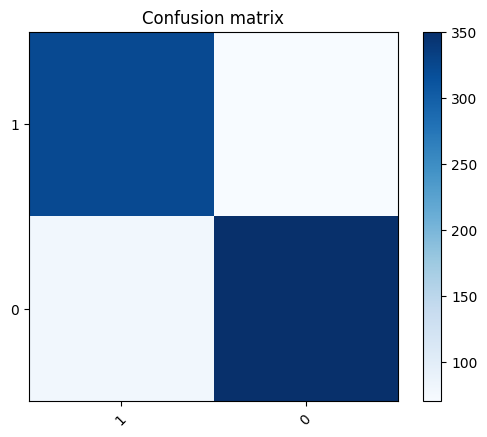

In [70]:
cm=confusion_matrix(y_train, tree_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, tree_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

LogisticRegression

In [71]:
lr= LogisticRegression(C= 1, penalty= 'l2')
lr.fit(x_train_prepared,y_train)
sample_data(lr)

prediction : [0 1 1 1 1]
labels: [0, 1, 1, 1, 1]


In [72]:
lr_pred = cross_val_predict(lr, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, lr_pred)
recall = recall_score(y_train, lr_pred)
fscore=f1_score(y_train ,lr_pred )
accuracy=accuracy_score(y_train ,lr_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.8480176211453745
Recall score: 0.8995327102803738
fscore score: 0.873015873015873
accuracy score: 0.8634146341463415


In [73]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}
gridsearchcv(param_grid_lr , LogisticRegression())

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Best Accuracy: 0.8634146341463416


C:\Users\Thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Thanos\AppData\Local\Programs\Pyt

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       392
           1       0.85      0.90      0.87       428

    accuracy                           0.86       820
   macro avg       0.87      0.86      0.86       820
weighted avg       0.86      0.86      0.86       820

Confusion matrix, without normalization
[[323  69]
 [ 43 385]]
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Thanos\AppData\Local\Temp\ipykernel_13020\1875046293.py", line 5, in <module>
    plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')
  File "C:\Users\Thanos\AppData\Local\Temp\ipykernel_13020\2374578404.py", line 27, in plot_confusion_matrix
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
NameError: name 'itertools' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Pyt

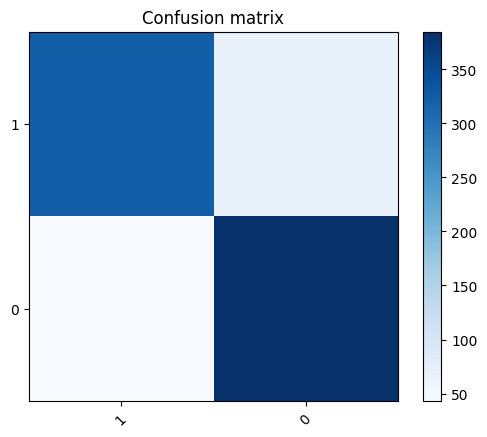

In [74]:
cm=confusion_matrix(y_train, lr_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, lr_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

RandomForestClassifier

In [75]:
rf = RandomForestClassifier(n_estimators=500, random_state=12, max_depth=5)
rf.fit(x_train,y_train)

In [76]:
rf_pred = cross_val_predict(rf, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, rf_pred)
recall = recall_score(y_train, rf_pred)
fscore=f1_score(y_train ,rf_pred )
accuracy=accuracy_score(y_train ,rf_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.8706896551724138
Recall score: 0.9439252336448598
fscore score: 0.905829596412556
accuracy score: 0.8975609756097561


              precision    recall  f1-score   support

           0       0.93      0.85      0.89       392
           1       0.87      0.94      0.91       428

    accuracy                           0.90       820
   macro avg       0.90      0.90      0.90       820
weighted avg       0.90      0.90      0.90       820

Confusion matrix, without normalization
[[332  60]
 [ 24 404]]
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Thanos\AppData\Local\Temp\ipykernel_13020\1702901537.py", line 5, in <module>
    plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')
  File "C:\Users\Thanos\AppData\Local\Temp\ipykernel_13020\2374578404.py", line 27, in plot_confusion_matrix
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
NameError: name 'itertools' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Pyt

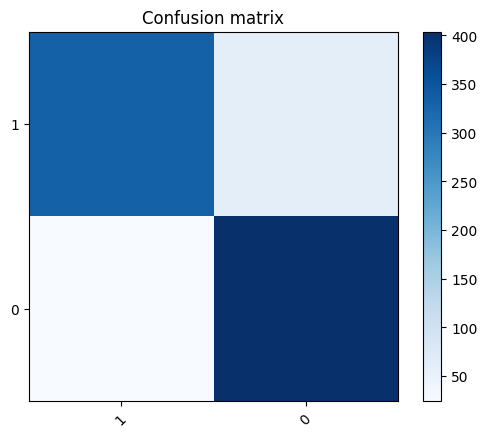

In [77]:
cm=confusion_matrix(y_train, rf_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, rf_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

naive bayes

In [79]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [80]:
nb_pred = cross_val_predict(nb, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, nb_pred)
recall = recall_score(y_train, nb_pred)
fscore=f1_score(y_train ,nb_pred )
accuracy=accuracy_score(y_train ,nb_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.8440366972477065
Recall score: 0.8598130841121495
fscore score: 0.8518518518518519
accuracy score: 0.8439024390243902


              precision    recall  f1-score   support

           0       0.84      0.83      0.84       392
           1       0.84      0.86      0.85       428

    accuracy                           0.84       820
   macro avg       0.84      0.84      0.84       820
weighted avg       0.84      0.84      0.84       820

Confusion matrix, without normalization
[[324  68]
 [ 60 368]]
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Thanos\AppData\Local\Temp\ipykernel_13020\46880251.py", line 5, in <module>
    plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')
  File "C:\Users\Thanos\AppData\Local\Temp\ipykernel_13020\2374578404.py", line 27, in plot_confusion_matrix
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
NameError: name 'itertools' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Thanos\AppData\Local\Programs\Python\Pytho

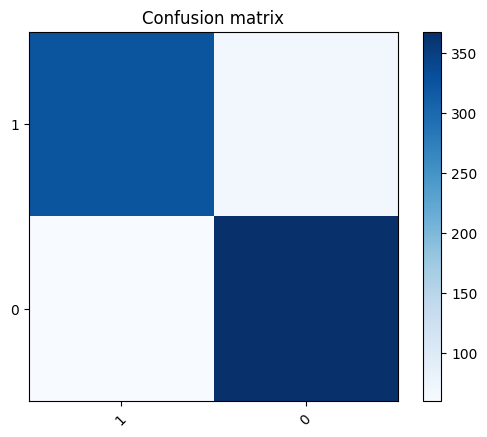

In [81]:
cm=confusion_matrix(y_train, nb_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, nb_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')